In [2]:
using DelimitedFiles, FileIO
using JLD2
using CairoMakie
using NCDatasets
using ClimaOcean.Bathymetry: remove_minor_basins!

In [3]:
datapath = joinpath(homedir(), "FjordsSim_data", "sognefjord")
netcdf_path = joinpath(datapath, "SOGN800LL_grd_v2.nc")

"C:\\Users\\Admin\\FjordsSim_data\\sognefjord\\SOGN800LL_grd_v2.nc"

In [4]:
dataset = NCDataset(netcdf_path);

In [5]:
lat_rho = dataset["lat_rho"][:,:]
lon_rho = dataset["lon_rho"][:,:];

In [6]:
m = -dataset["h"][:,:];

In [7]:
m[m .>= -5] .= 0;

In [8]:
remove_minor_basins!(m, 1)

In [9]:
minimum(m)

-1264.9859461977119

In [10]:
z_faces = [
      -1200.0,
      -1000.0,
      -800.0,
      -600.0,
      -500.0,
      -400.0,
      -300.0,
      -200.0,
      -150.0,
      -100.0,
      -75.0,
      -50.0,
      -30.0,
      -20.0,
      -10.0,
       -5.0,
        0.0
];

In [11]:
m[-10 .<= m .< 0] .= -10;

In [12]:
maximum(filter(!isnan, ifelse.(m .== 0, NaN, m)))

-10.0

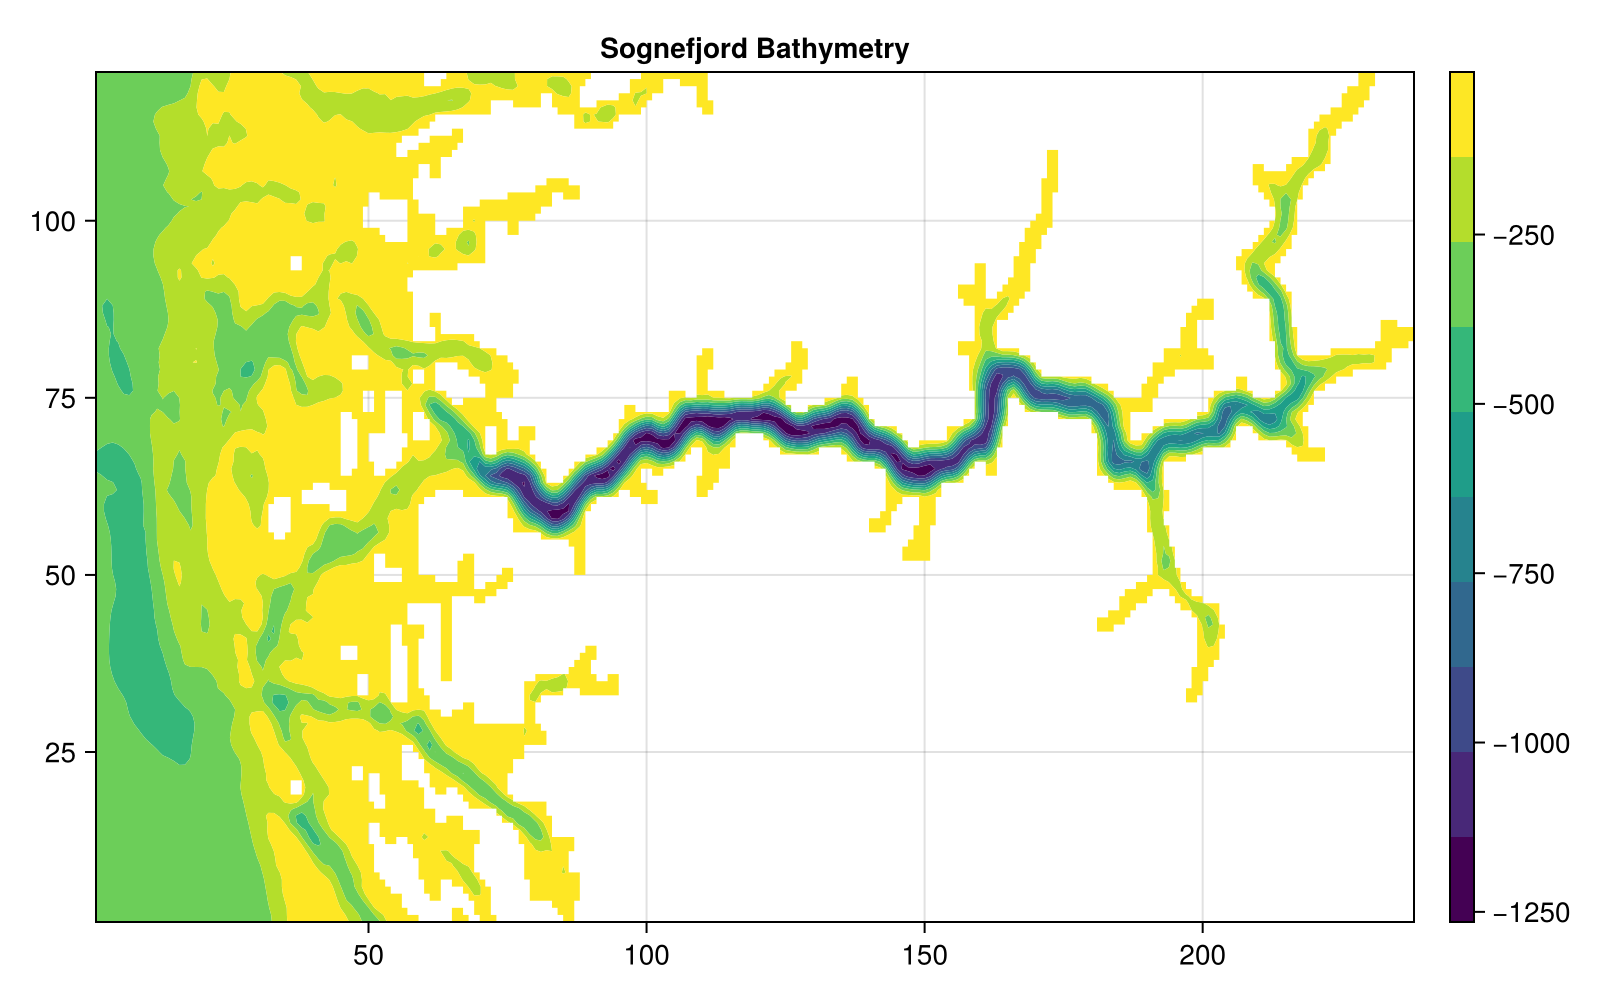

In [13]:
fig = Figure(size = (800, 500))
ax = Axis(fig[1, 1], title = "Bathymetry")
ax.title = "Sognefjord Bathymetry"
cf = contourf!(ax, ifelse.(m .== 0, NaN, m))
Colorbar(fig[1, 2], cf)
fig

In [14]:
@save joinpath(datapath, "Sogn_topo800.jld2") "depth" = m "z_faces" = z_faces